In [1]:
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy

from scipy.stats import probplot
from scipy import stats
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
A = [1,2,3,4,5]
B = [1,2,3,4,50]

In [3]:
a = pd.DataFrame({'A' : A , 'B' : B})
a

,A,B
0,1,1
1,2,2
2,3,3
3,4,4
4,5,50


In [4]:
a.describe()

,A,B
count,5.000000,5.000000
mean,3.000000,12.000000
std,1.581139,21.272047
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,50.000000


In [5]:
q1=a['B'].quantile(0.25)
q2=a['B'].quantile(0.5)
q3=a['B'].quantile(0.75)
iqr=q3-q1
iqr

2.0

In [6]:
outlier = a['B']>q3+1.5*iqr
a[outlier]

,A,B
4,5,50


In [7]:
# fig = plt.figure(figsize= (8,8))
# ax = sns.boxplot(y = a.iloc[::] , x= ['A','B'] , data = a)

In [8]:
A  ='29 30 49 21 39 38 15 39 48 41 50 38 33 40 51 29 31 42 29 69 37 20 49 40 10 49 49 49 35 45 22 45 20 45 30 41 40 38 10 31 47 19 31 21 41 46 28 29 18 28'

A = list(map(int, A.split(' ')))
A
#print(len(A))

[29,
 30,
 49,
 21,
 39,
 38,
 15,
 39,
 48,
 41,
 50,
 38,
 33,
 40,
 51,
 29,
 31,
 42,
 29,
 69,
 37,
 20,
 49,
 40,
 10,
 49,
 49,
 49,
 35,
 45,
 22,
 45,
 20,
 45,
 30,
 41,
 40,
 38,
 10,
 31,
 47,
 19,
 31,
 21,
 41,
 46,
 28,
 29,
 18,
 28]

In [9]:
print(max(A))
print(min(A))
print(sum(A) / 50)

69
10
35.48


## 양적 자료의 도수분포표 작성 프로세스

1. 계급의 수 : K= k= n^(1/2) +- 3

2. 각 계급에 일정하게 주어지는 각 계급 간격을 결정한다.

3. R=(최대 자료 값) - (최소 자료 값) ==> 계급간격(w) ~~ R/k

4. 제 1계급의 하한 = 25283- 1/2 = 25,283.5

In [10]:
# K = 50^(1/2) +3 = 10~11
# R= 69 -10 = 59
# W - 59/10 = 5.9

#bins = np.arange(min(A), max(A)+5.9, 5.9)
bins = np.arange(9.5, 72.5 + 9 , 9)
hist, bins = np.histogram(A, bins)
print(hist)
print(bins)
Steps = []
interval = []
for i in range(len(bins)-1):
    Steps.append(int(bins[i+1] - (9/2)))
    interval.append('{} ~ {}'.format(bins[i] , bins[i+1]))
print(Steps)
print('Steps : {}'.format(Steps)) #계급값
print(interval)
print('interval : {}'.format(interval))
print(len(hist))
print('hist : {}'.format(hist))
print(len(bins))
print('bins : {}'.format(bins))
ratio = []
for i in hist:
    ratio.append(round(i/50 ,2))
print('ratio : {}'.format(ratio))



[ 4  6 13 16 10  0  1]
[ 9.5 18.5 27.5 36.5 45.5 54.5 63.5 72.5]
[14, 23, 32, 41, 50, 59, 68]
Steps : [14, 23, 32, 41, 50, 59, 68]
['9.5 ~ 18.5', '18.5 ~ 27.5', '27.5 ~ 36.5', '36.5 ~ 45.5', '45.5 ~ 54.5', '54.5 ~ 63.5', '63.5 ~ 72.5']
interval : ['9.5 ~ 18.5', '18.5 ~ 27.5', '27.5 ~ 36.5', '36.5 ~ 45.5', '45.5 ~ 54.5', '54.5 ~ 63.5', '63.5 ~ 72.5']
7
hist : [ 4  6 13 16 10  0  1]
8
bins : [ 9.5 18.5 27.5 36.5 45.5 54.5 63.5 72.5]
ratio : [0.08, 0.12, 0.26, 0.32, 0.2, 0.0, 0.02]


In [11]:
B = pd.DataFrame({'계급간격' : interval ,'도수' : hist , '상대도수' : ratio, '계급값' : Steps} )
B

,계급간격,도수,상대도수,계급값
0,9.5 ~ 18.5,4,0.08,14
1,18.5 ~ 27.5,6,0.12,23
2,27.5 ~ 36.5,13,0.26,32
3,36.5 ~ 45.5,16,0.32,41
4,45.5 ~ 54.5,10,0.20,50
5,54.5 ~ 63.5,0,0.00,59
6,63.5 ~ 72.5,1,0.02,68


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

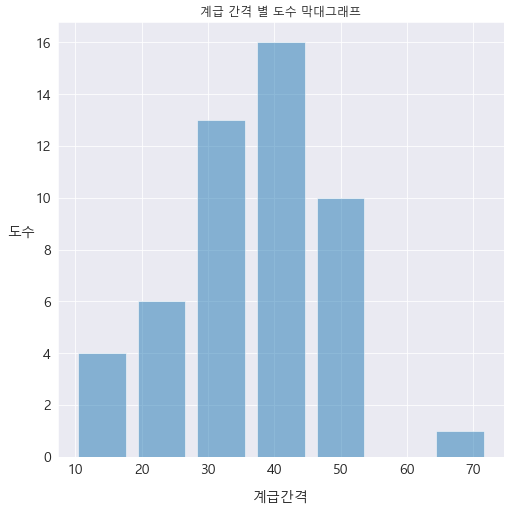

In [12]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
#ax = plt.plot(figsize=(8,8))
plt.hist(A, bins , rwidth = 0.8 , alpha = 0.5)
plt.title('계급 간격 별 도수 막대그래프')
plt.xlabel('계급간격' , fontsize = 14 , labelpad= 14 ,rotation = 0)
plt.ylabel('도수' , fontsize = 14 , labelpad= 14 ,rotation = 0)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# for i,txt in enumerate(bins):
#     b = int(txt)
#     if  b == max(bins):
#         ax.text(i, b+0.4, str(txt)+'개' , ha='center' , color = 'red' , fontweight = 'bold' , fontsize=17)
#         #어디 막대, 막대기의 위쪽에
#     else:
#         ax.text(i, b+0.5, str(txt)+'개' , ha='center' , color = 'dimgray' , fontsize=13 , fontweight = 'bold')

# ax = sns.histplot(data=bins , x= hist)
# plt.hist(A, bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
# plt.xlabel('계급간격' , fontsize = 14)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)

4
6
13
16
10
0
1


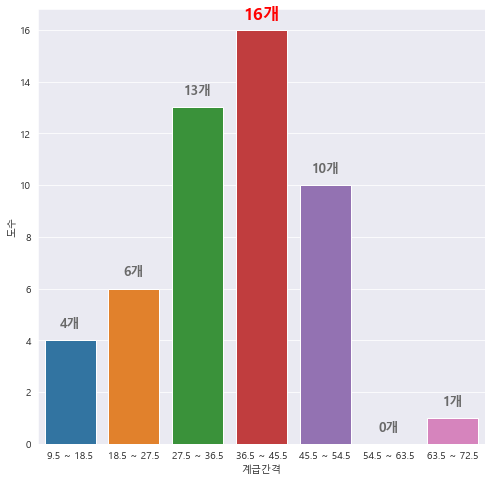

In [13]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = plt.plot(figsize= (8,8))

ax = sns.barplot(x=B['계급간격'] , y = B['도수'])

for i,txt in enumerate(B['도수']):
    b = txt
    print(b)
    if  b == max(B['도수']):
        ax.text(i, b+0.4, str(txt)+'개' , ha='center' , color = 'red' , fontweight = 'bold' , fontsize=17)
        #어디 막대, 막대기의 위쪽에
    else:
        ax.text(i, b+0.5, str(txt)+'개' , ha='center' , color = 'dimgray' , fontsize=13 , fontweight = 'bold')
# plt.hist(A, bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
# plt.xlabel('계급간격' , fontsize = 14)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)

#도수 분포표에 따른 가중평균

In [14]:
GazungPyeong = []
for i in range(len(B['계급값'])):
    GazungPyeong.append(round(B['계급값'][i] * B['상대도수'][i] ,2))
print(GazungPyeong)
print(sum(GazungPyeong))

[1.12, 2.76, 8.32, 13.12, 10.0, 0.0, 1.36]
36.68


## 절사평균

In [15]:
A =  '9.59 4.62 0.65 7.75 16.98 11.78 7.24 10.15 25.49 11.44 10.37 9.33 15.04 12.16 16.63 12.06 9.70 12.46 8.05 19.91 5.58 12.48 4.35 16.41 22.53 17.56 18.40 10.86 27.43 7.39 14.57 11.92 2.00'

A = list(map(float , A.split(' ')))
A

[9.590,
 4.620,
 0.650,
 7.750,
 16.980,
 11.780,
 7.240,
 10.150,
 25.490,
 11.440,
 10.370,
 9.330,
 15.040,
 12.160,
 16.630,
 12.060,
 9.700,
 12.460,
 8.050,
 19.910,
 5.580,
 12.480,
 4.350,
 16.410,
 22.530,
 17.560,
 18.400,
 10.860,
 27.430,
 7.390,
 14.570,
 11.920,
 2.000]

In [16]:
var = np.var(A)
var

37.34943103764921

In [17]:
import math

std = math.sqrt(var)
std

6.111

In [18]:
var2 = np.var(A , ddof=1)
std2 = math.sqrt(var2)
std2

6.206

In [19]:
A = pd.Series(A)
A

0      9.59
1      4.62
2      0.65
3      7.75
4     16.98
5     11.78
6      7.24
7     10.15
8     25.49
9     11.44
10    10.37
11     9.33
12    15.04
13    12.16
14    16.63
15    12.06
16     9.70
17    12.46
18     8.05
19    19.91
20     5.58
21    12.48
22     4.35
23    16.41
24    22.53
25    17.56
26    18.40
27    10.86
28    27.43
29     7.39
30    14.57
31    11.92
32     2.00
dtype: float64

In [20]:
A.describe()

count    33.000000
mean     12.208485
std       6.206174
min       0.650000
25%       8.050000
50%      11.780000
75%      16.410000
max      27.430000
dtype: float64

In [21]:
B = [6,3,4,2,4]
B = pd.Series(B)
B

0    6
1    3
2    4
3    2
4    4
dtype: int64

In [22]:
B.describe()

count    5.00000
mean     3.80000
std      1.48324
min      2.00000
25%      3.00000
50%      4.00000
75%      4.00000
max      6.00000
dtype: float64

In [23]:
var = np.var(B ,ddof=1) #표본분산 위해서는 ddof =1 설정
var

2.200

In [24]:
std= np.std(B ,ddof= 1)
std

1.483

In [25]:
std = math.sqrt(var)
std

1.483

In [26]:
A='30.74 28.44 30.20 32.67 33.29 31.06 30.08 30.62 27.31 27.88 ' \
  '26.03 29.93 31.63 28.13 30.62 27.80 28.69 28.14 31.62 30.61 ' \
  '27.95 31.62 29.37 30.61 31.80 29.32 29.92 31.97 30.39 29.14 ' \
  '30.14 31.54 31.03 28.52 28.00 28.46 30.38 30.64 29.51 31.04 ' \
  '27.00 30.15 29.13 27.63 30.87 28.67 27.39 33.20 29.52 30.86 ' \
  '34.01 29.41 31.18 34.59 33.35 33.73 28.39 26.82 29.53 32.55 ' \
  '30.34 32.44 27.09 29.51 31.36 31.61 31.24 28.83 31.88 32.24 ' \
  '31.72 28.34 29.89 30.27 31.42 29.11 29.36 32.24 29.56 31.72 ' \
  '30.67 28.85 30.87 27.17 30.85 28.75 25.84 28.79 31.74 34.59 ' \
  '32.69 26.23 28.20 31.62 33.48 28.00 33.86 29.22 26.50 30.89'

A = list(map(float , A.split(' ')))
#A = A.(lambda x : round(x ,2))
A

[30.740,
 28.440,
 30.200,
 32.670,
 33.290,
 31.060,
 30.080,
 30.620,
 27.310,
 27.880,
 26.030,
 29.930,
 31.630,
 28.130,
 30.620,
 27.800,
 28.690,
 28.140,
 31.620,
 30.610,
 27.950,
 31.620,
 29.370,
 30.610,
 31.800,
 29.320,
 29.920,
 31.970,
 30.390,
 29.140,
 30.140,
 31.540,
 31.030,
 28.520,
 28.000,
 28.460,
 30.380,
 30.640,
 29.510,
 31.040,
 27.000,
 30.150,
 29.130,
 27.630,
 30.870,
 28.670,
 27.390,
 33.200,
 29.520,
 30.860,
 34.010,
 29.410,
 31.180,
 34.590,
 33.350,
 33.730,
 28.390,
 26.820,
 29.530,
 32.550,
 30.340,
 32.440,
 27.090,
 29.510,
 31.360,
 31.610,
 31.240,
 28.830,
 31.880,
 32.240,
 31.720,
 28.340,
 29.890,
 30.270,
 31.420,
 29.110,
 29.360,
 32.240,
 29.560,
 31.720,
 30.670,
 28.850,
 30.870,
 27.170,
 30.850,
 28.750,
 25.840,
 28.790,
 31.740,
 34.590,
 32.690,
 26.230,
 28.200,
 31.620,
 33.480,
 28.000,
 33.860,
 29.220,
 26.500,
 30.890]

In [27]:
A = pd.DataFrame(A)
A

,0
0,30.74
1,28.44
2,30.20
3,32.67
4,33.29
...,...
95,28.00
96,33.86
97,29.22
98,26.50


In [28]:
A.describe()

,0
count,100.000000
mean,30.138000
std,1.991193
min,25.840000
25%,28.685000
50%,30.235000
75%,31.612500
max,34.590000


In [29]:
bins = np.arange(23.5, 37.5 + 0.5 , 0.5)
hist, bins = np.histogram(A, bins)
print('hist : {}'.format(hist))
print('bins : {}'.format(bins))
Steps=[]
for i in range(len(bins)-1):
    Steps.append((bins[i+1] - (0.5/2)))
print(Steps)


DOSU = pd.DataFrame({'계급값' : Steps  , '도수' : hist})
DOSU

hist : [ 0  0  0  0  1  2  2  5  4  9  7  8  8  8 12  7 12  3  3  4  2  1  2  0
  0  0  0  0]
bins : [23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.
 30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37.
 37.5]
[23.75, 24.25, 24.75, 25.25, 25.75, 26.25, 26.75, 27.25, 27.75, 28.25, 28.75, 29.25, 29.75, 30.25, 30.75, 31.25, 31.75, 32.25, 32.75, 33.25, 33.75, 34.25, 34.75, 35.25, 35.75, 36.25, 36.75, 37.25]


,계급값,도수
0,23.75,0
1,24.25,0
2,24.75,0
3,25.25,0
4,25.75,1
5,26.25,2
6,26.75,2
7,27.25,5
8,27.75,4
9,28.25,9


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

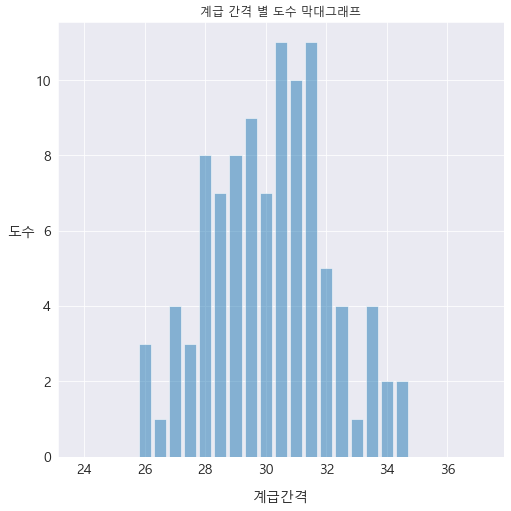

In [30]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
#ax = plt.plot(figsize=(8,8))
plt.hist(A, Steps , rwidth = 0.8 , alpha = 0.5)
plt.title('계급 간격 별 도수 막대그래프')
plt.xlabel('계급간격' , fontsize = 14 , labelpad= 14 ,rotation = 0)
plt.ylabel('도수' , fontsize = 14 , labelpad= 14 ,rotation = 0)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [31]:
# DOSU = DOSU.transpose()
# DOSU
A.rename(columns = {0: 'data'} , inplace=True)
A

,data
0,30.74
1,28.44
2,30.20
3,32.67
4,33.29
...,...
95,28.00
96,33.86
97,29.22
98,26.50


In [32]:
hist

array([ 0,  0,  0,  0,  1,  2,  2,  5,  4,  9,  7,  8,  8,  8, 12,  7, 12,
        3,  3,  4,  2,  1,  2,  0,  0,  0,  0,  0], dtype=int64)

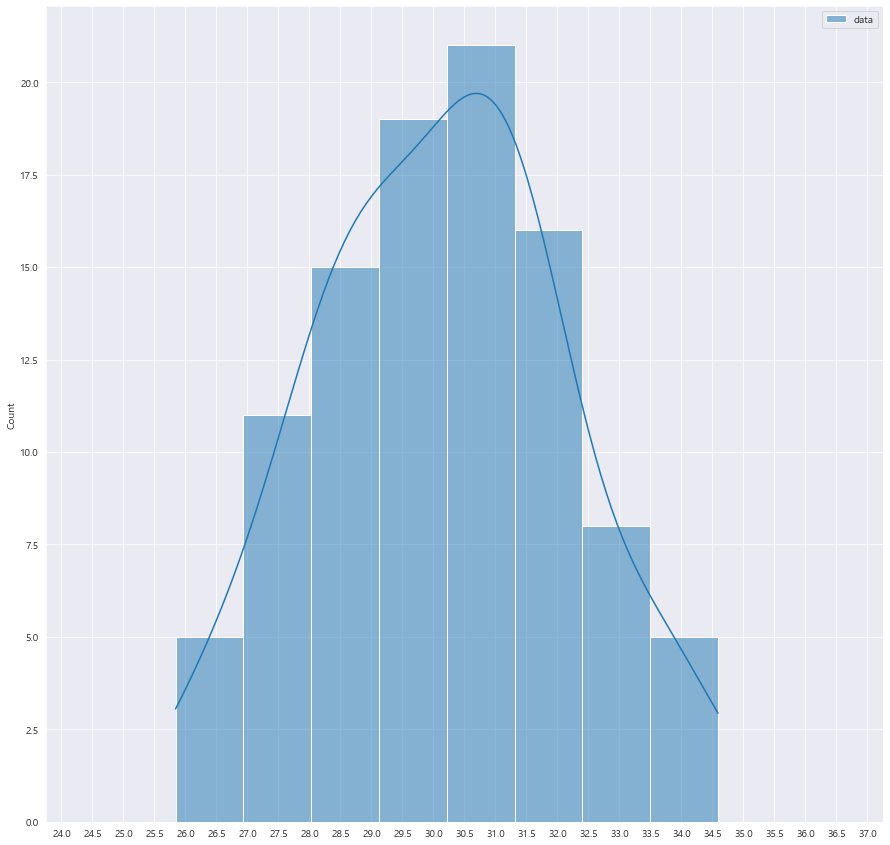

In [33]:
from matplotlib import ticker

fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
# ax = sns.subplot(1,1,1)
#ax = fig.add_subplot(1,1,1)

#ax.set_yticks(minor_y_ticks, minor=True)
ax= sns.histplot(A, kde=True) #정규분포 그래프 표시
# set_x = np.arange(Steps[0] , Steps[-1], 0.5).tolist()
# print(set_x)
ax.set_xlim([Steps[0] , Steps[-1]])
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
# major_y_ticks = np.arange(0, max(hist)+1, 0.5)
# # # minor_y_ticks = np.arange(0, 25, 1)
# ax.set_yticks(major_y_ticks)
# plt.xlim([Steps[0],Steps[-1]])
# plt.ylim([0,max(hist)+10])
#color='blue', hist_kws={'edgecolor': 'gray'},kde_kws={'linewidth': 2})
# ax.show()
# ax.set_xlim(Steps[0] , Steps[-1])
# ax = sns.barplot(x=Steps, y = hist)
# print(list(hist))
#for p in ax.patches:





plt.show()

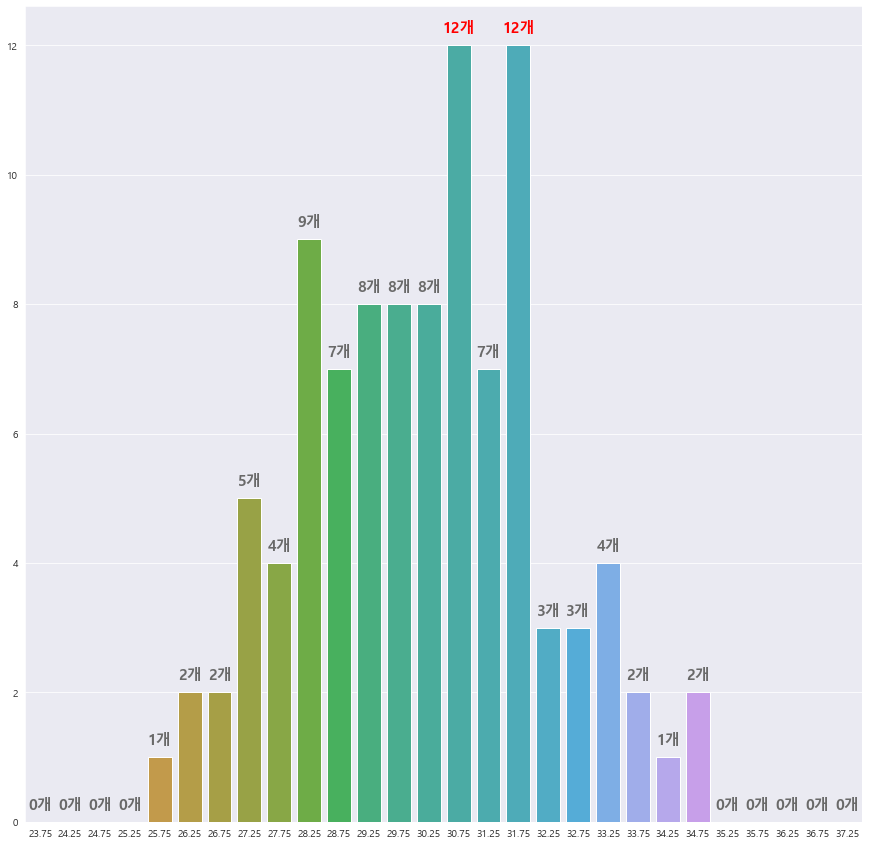

In [34]:
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')

ax = sns.barplot(x= Steps , y =hist)
for i,txt in enumerate(list(hist)):
    b = txt
    #print(b)
    if  b == max(list(hist)):
        ax.text(i, b+0.2, str(txt)+'개' , ha='center' , color = 'red' , fontweight = 'bold' , fontsize=15)
        #어디 막대, 막대기의 위쪽에
    else:
        ax.text(i, b+0.2, str(txt)+'개' , ha='center' , color = 'dimgray' , fontsize=15 , fontweight = 'bold')

In [35]:
DOSU

,계급값,도수
0,23.75,0
1,24.25,0
2,24.75,0
3,25.25,0
4,25.75,1
5,26.25,2
6,26.75,2
7,27.25,5
8,27.75,4
9,28.25,9


In [36]:
Steps

[23.75,
 24.25,
 24.75,
 25.25,
 25.75,
 26.25,
 26.75,
 27.25,
 27.75,
 28.25,
 28.75,
 29.25,
 29.75,
 30.25,
 30.75,
 31.25,
 31.75,
 32.25,
 32.75,
 33.25,
 33.75,
 34.25,
 34.75,
 35.25,
 35.75,
 36.25,
 36.75,
 37.25]

In [37]:
A

,data
0,30.74
1,28.44
2,30.20
3,32.67
4,33.29
...,...
95,28.00
96,33.86
97,29.22
98,26.50


p.get_x() : 25.75
p.get_x() : 26.25
p.get_x() : 26.75
p.get_x() : 27.25
p.get_x() : 27.75
p.get_x() : 28.25
p.get_x() : 28.75
p.get_x() : 29.25
p.get_x() : 29.75
p.get_x() : 30.25
p.get_x() : 30.75
p.get_x() : 31.25
p.get_x() : 31.75
p.get_x() : 32.25
p.get_x() : 32.75
p.get_x() : 33.25
p.get_x() : 33.75
p.get_x() : 34.25
Rectangle(xy=(25.84, 0), width=0.5, height=3, angle=0)
Rectangle(xy=(26.34, 0), width=0.5, height=2, angle=0)
Rectangle(xy=(26.84, 0), width=0.5, height=4, angle=0)
Rectangle(xy=(27.34, 0), width=0.5, height=3, angle=0)
Rectangle(xy=(27.84, 0), width=0.5, height=7, angle=0)
Rectangle(xy=(28.34, 0), width=0.5, height=10, angle=0)
Rectangle(xy=(28.84, 0), width=0.5, height=6, angle=0)
Rectangle(xy=(29.34, 0), width=0.5, height=8, angle=0)
Rectangle(xy=(29.84, 0), width=0.5, height=8, angle=0)
Rectangle(xy=(30.34, 0), width=0.5, height=10, angle=0)
Rectangle(xy=(30.84, 0), width=0.5, height=10, angle=0)
Rectangle(xy=(31.34, 0), width=0.5, height=12, angle=0)
Rectangle(xy

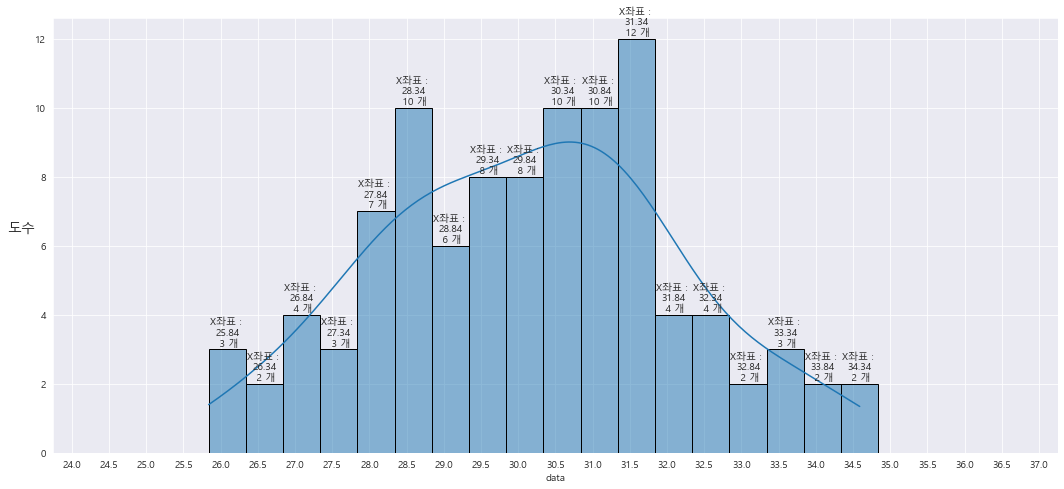

In [38]:
plt.figure(figsize=(18,8))

ax = sns.histplot(data=A, x='data' ,bins = 28 , kde = True , stat= 'count' , cumulative=False , edgecolor='k' , binwidth=0.5 )
#ax.set_xticklabels( [curr_bin for curr_bin in Steps])
# ax.set_xticks(range(len(Steps) ,0.5))

ax.set_xlim([Steps[0] , Steps[-1]])
ax.set_ylabel('도수' , fontsize = 14 , labelpad= 14 ,rotation = 0)
xy =[]
for p in ax.patches:
    print("p.get_x() : {}".format(p.get_x() - 0.09))
    xy.append([p.get_x()-0.09 , p.get_y()])
# ax.set_
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
for p in ax.patches:
    print(p)
    ax.text(x = p.get_x() + p.get_width()/2,
            y = p.get_height() + len(A)*0.001,
            s =  'X좌표 : \n{}\n {} {}'.format(p.get_x(),p.get_height(),'개'),
            #s = f'{(p.get_height()/ len(A)) * 100: 1.1f}개',
            ha = 'center')
#plt.axis(option='auto')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p.get_x() : 25.75
p.get_x() : 26.062
p.get_x() : 26.375
p.get_x() : 26.688
p.get_x() : 27.0
p.get_x() : 27.312
p.get_x() : 27.625
p.get_x() : 27.938
p.get_x() : 28.25
p.get_x() : 28.562
p.get_x() : 28.875
p.get_x() : 29.188
p.get_x() : 29.5
p.get_x() : 29.813
p.get_x() : 30.125
p.get_x() : 30.438
p.get_x() : 30.75
p.get_x() : 31.063
p.get_x() : 31.375
p.get_x() : 31.688
p.get_x() : 32.0
p.get_x() : 32.312
p.get_x() : 32.625
p.get_x() : 32.938
p.get_x() : 33.25
p.get_x() : 33.562
p.get_x() : 33.875
p.get_x() : 34.188
Rectangle(xy=(25.84, 0), width=0.3125, height=2, angle=0)
Rectangle(xy=(26.1525, 0), width=0.3125, height=1, angle=0)
Rectangle(xy=(26.465, 0), width=0.3125, height=1, angle=0)
Rectangle(xy=(26.7775, 0), width=0.3125, height=2, angle=0)
Rectangle(xy=(27.09, 0), width=0.3125, height=4, angle=0)
Rectangle(xy=(27.4025, 0), width=0.3125, height=1, angle=0)
Rectangle(xy=(27.715, 0), width=0.3125, height=5, angle=0)
Rectangle(xy=(28.0275, 0), width=0.3125, height=3, angle=0)
Rect

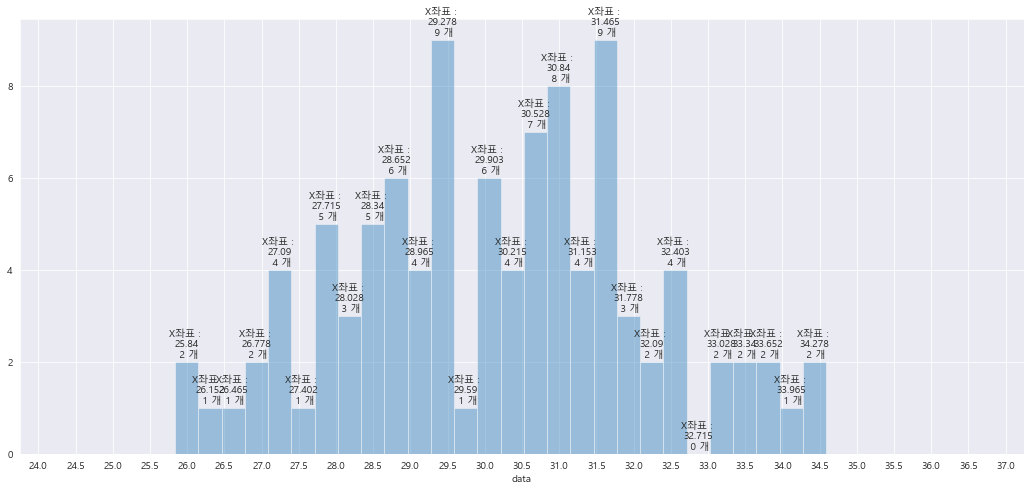

In [39]:
plt.figure(figsize=(18,8))

ax = sns.distplot(A['data'],bins = 28 , kde=False)
#ax.set_xticklabels( [curr_bin for curr_bin in Steps])
# ax.set_xticks(range(len(Steps) ,0.5))

ax.set_xlim([Steps[0] , Steps[-1]])
xy =[]
for p in ax.patches:
    print("p.get_x() : {}".format(round(p.get_x() - 0.09, 3)))
    xy.append([p.get_x()-0.09 , p.get_y()])
# ax.set_
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
for p in ax.patches:
    print(p)
    ax.text(x = p.get_x() + p.get_width()/2,
            y = p.get_height() + len(A)*0.001,
            s =  'X좌표 : \n{}\n {} {}'.format(round(p.get_x(),3),int(p.get_height()),'개'),
            #s = f'{(p.get_height()/ len(A)) * 100: 1.1f}개',
            ha = 'center')
#plt.axis(option='auto')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


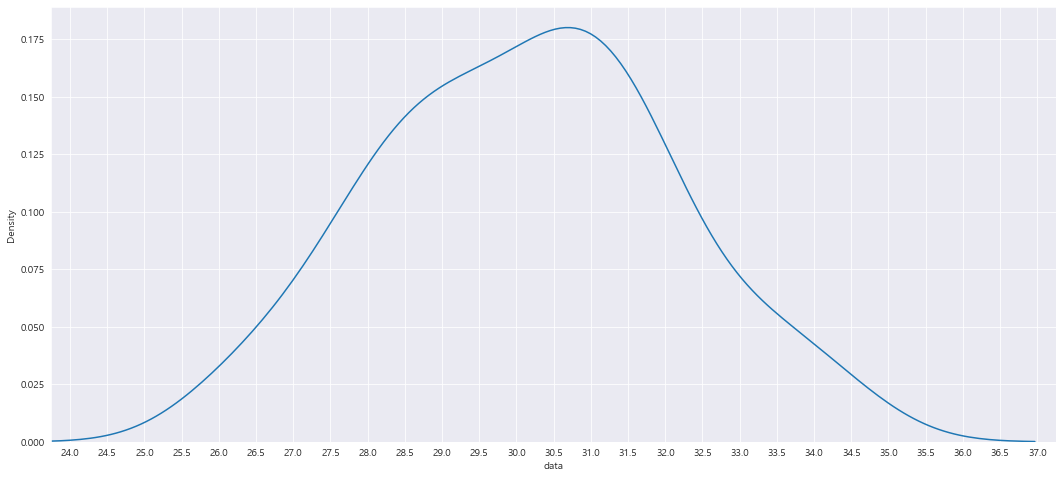

In [40]:
plt.figure(figsize=(18,8))


ax2 = sns.distplot(A['data'],bins = 28 , hist=False , kde=True)
ax2.set_xlim([Steps[0] , Steps[-1]])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


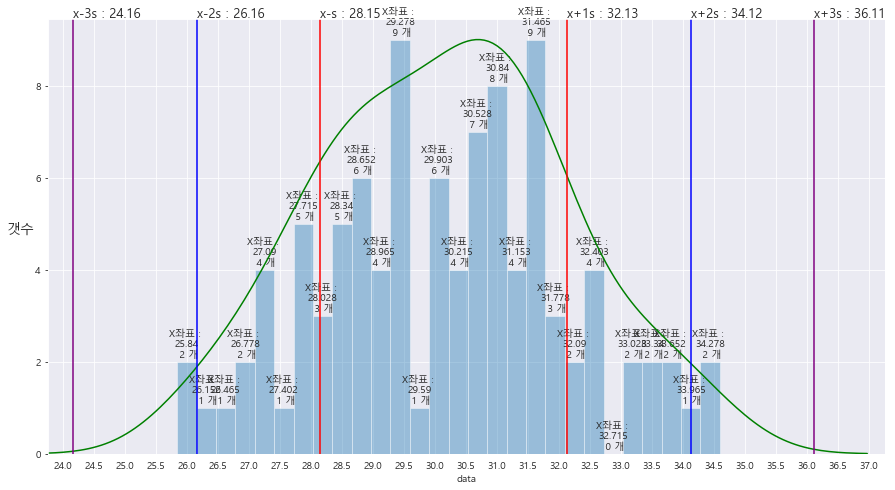

In [61]:
fig , ax1 = plt.subplots(figsize= (15,8))

ax1 = sns.distplot(A['data'],bins = 28 , kde=False)
ax1.set_xlim([Steps[0] , Steps[-1]])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
for p in ax1.patches:
    #print(p)
    ax1.text(x = p.get_x() + p.get_width()/2,
            y = p.get_height() + len(A)*0.001,
            s =  'X좌표 : \n{}\n {} {}'.format(round(p.get_x(),3),int(p.get_height()),'개'),
            #s = f'{(p.get_height()/ len(A)) * 100: 1.1f}개',
            ha = 'center')
ax1.set_ylabel('갯수' , fontsize = 14 , labelpad= 14 ,rotation = 0)
ax2 = ax1.twinx() #한 그래프에 두번째 plot 넣기
ax2 = sns.distplot(A['data'],bins = 28 , hist=False , kde=True, color='green')
ax2.set_xlim([Steps[0] , Steps[-1]])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
ax2.axes.yaxis.set_visible(False) #y축 없애기

x_s1 = float(A.mean() - A.std()*1)
x_s2 = float(A.mean() - A.std()*2)
x_s3 = float(A.mean() - A.std()*3)
x_plus_s1 = float(A.mean() + A.std())
x_plus_s2 = float(A.mean() + A.std()*2)
x_plus_s3 = float(A.mean() + A.std()*3)
# 막대기의 두께 in Seaborn


ax2.axvline(x= x_s1, ymin=0 , ymax=1 , color = 'red' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_s1 , .19 , f'x-s : {round(x_s1,2)}',fontsize=13)
ax2.axvline(x= x_s2, ymin=0 , ymax=1 , color = 'blue' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_s2 , .19 , f'x-2s : {round(x_s2,2)}',fontsize=13)
ax2.axvline(x= x_s3, ymin=0 , ymax=1 , color = 'purple' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_s3 , .19 , f'x-3s : {round(x_s3,2)}',fontsize=13)

ax2.axvline(x= x_plus_s1, ymin=0 , ymax=1 , color = 'red' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_plus_s1 , .19 , f'x+1s : {round(x_plus_s1,2)}',fontsize=13)
ax2.axvline(x= x_plus_s2, ymin=0 , ymax=1 , color = 'blue' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_plus_s2 , .19 , f'x+2s : {round(x_plus_s2,2)}',fontsize=13)
ax2.axvline(x= x_plus_s3, ymin=0 , ymax=1 , color = 'purple' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_plus_s3 , .19 , f'x+3s : {round(x_plus_s3,2)}',fontsize=13)



plt.show()

In [42]:
A.describe()

,data
count,100.000000
mean,30.138000
std,1.991193
min,25.840000
25%,28.685000
50%,30.235000
75%,31.612500
max,34.590000


In [49]:
print(float(A.mean() - A.std()*3))

24.164421812377732


In [ ]:
hist
print(len(hist))

In [ ]:
estimator = stats.gaussian_kde(A, bw_method='silverman')
K = estimator(A)
plt

In [ ]:
res = sns.kdeplot(A['data'])
res

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(A['data'] , kde =True)

In [ ]:
sns.displot(A , x="data",kind = 'kde')

https://junstar92.tistory.com/91


In [ ]:
plt.figure(figsize=(15,8))

ax = sns.distplot(A['data'] , bins = len(hist) ,rug=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
# for p in ax.patches:
#     print(p)
#     ax.text(x = p.get_x() + p.get_width()/2,
#             y = p.get_height() + len(A)*0.001,
#             s =  '{} {}'.format(p.get_height(),'개'),
#             #s = f'{(p.get_height()/ len(A)) * 100: 1.1f}개',
#             ha = 'center')
plt.show()

In [ ]:
Steps = [round(i , 1) for i in Steps]
Steps

In [ ]:
fig = plt.figure(figsize = (8,8))



ax = sns.distplot(data=A , bins = len(hist) , kde=True)
ax.set_xticks(np.arange(Steps[0] , Steps[-1] , 0.5))
#sns.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

In [ ]:
sns.pairplot(A)
plt.show()